# Part I - FordGoBike Dataset
## by Umar Muhammed Abubakar

### Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#prelim)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusion](#Conclusion)


## Introduction
> Like other bike share services, Ford GoBike uses a fleet of sturdy, durable bikes that are locked into a system of docking stations spread across the city of San francisco. The bikes are perfect for one-way travels because they may be unlocked from one station and returned to any other station in the network. The bike share program is used by people for a variety of purposes, including getting to and from work, school, and doing errands. It is a fun, efficient, and inexpensive mode of transportation.

>The bikes are available for use 24 hours a day and riders have access to all bikes in the network when they become a registered member or purchase a pass.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sb

%matplotlib inline

In [2]:
# Load the fordgobike trip dataset
df_fordgobike_trips = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# overview of dataset and its composition
print(df_fordgobike_trips.shape)
print(df_fordgobike_trips.dtypes)
df_fordgobike_trips.head()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# check the dataset basic information
df_fordgobike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# checking for null values 
df_fordgobike_trips.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# checking for null values
df_fordgobike_trips.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# checking for duplicated values
df_fordgobike_trips.duplicated().sum()

0

### Define 
- Converting start_time and end_time to datetime format, start_station_id, end_station_id, and bike_id to object format and user_type and member_gender to category format from the df_fordgobike_trips dataset

In [8]:
# fixing start_time end_time to datetime data type
df_fordgobike_trips['start_time'] = pd.to_datetime(df_fordgobike_trips.start_time)
df_fordgobike_trips['end_time'] = pd.to_datetime(df_fordgobike_trips.end_time)
# fixing start_station_id, end_station_id and bike_id to object data type
df_fordgobike_trips['start_station_id'] = df_fordgobike_trips['start_station_id'].astype('str')
df_fordgobike_trips['end_station_id'] = df_fordgobike_trips['end_station_id'].astype('str')
df_fordgobike_trips['bike_id'] = df_fordgobike_trips['bike_id'].astype('str')
# fixing user_type and member_gender to category data type
df_fordgobike_trips['user_type'] = df_fordgobike_trips['user_type'].astype('category')
df_fordgobike_trips['member_gender'] = df_fordgobike_trips['member_gender'].astype('category')

### Test

In [9]:
# Testing to see if the data types have been changed
df_fordgobike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### Define 
Calculating age distribution of members by subtracting 2019 from their birth year and adding a new column to keep the members age

In [10]:
# add a new column to calculate members age from 'member_birth_year'
df_fordgobike_trips['member_age'] = 2019 - df_fordgobike_trips['member_birth_year'].dropna()
df_fordgobike_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


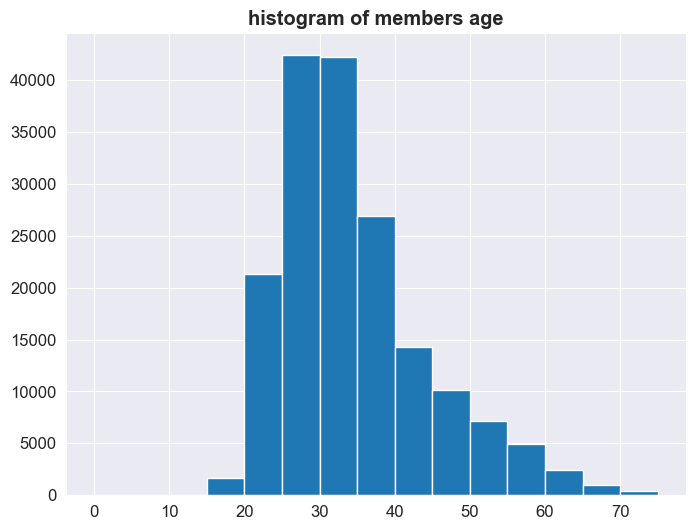

In [46]:
# visually examining members' age for outliers  over 100 yrs old
plt.figure(figsize=[8, 6])
bins_edges = np.arange(0, df_fordgobike_trips['member_age'].max()+5, 5)
plt.hist(df_fordgobike_trips['member_age'], bins=bins_edges);
plt.title("histogram of members age", fontweight='bold');

### Test

In [12]:
# Checking newly added column 
df_fordgobike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### Define: 
From the histogram above, 99.9% of members ages are 75 and below. I will keep proportion of members ages from 75 and below

In [13]:
# Keeping members age from 75 and below
df_fordgobike_trips = df_fordgobike_trips.query('member_age <= 75') 

### Test

In [14]:
# check our new non-null values
df_fordgobike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174884 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174884 non-null  int64         
 1   start_time               174884 non-null  datetime64[ns]
 2   end_time                 174884 non-null  datetime64[ns]
 3   start_station_id         174884 non-null  object        
 4   start_station_name       174689 non-null  object        
 5   start_station_latitude   174884 non-null  float64       
 6   start_station_longitude  174884 non-null  float64       
 7   end_station_id           174884 non-null  object        
 8   end_station_name         174689 non-null  object        
 9   end_station_latitude     174884 non-null  float64       
 10  end_station_longitude    174884 non-null  float64       
 11  bike_id                  174884 non-null  object        
 12  user_type       

In [15]:
# Convert the member_age and birth year to integer format
df_fordgobike_trips.member_age = df_fordgobike_trips.member_age.astype(int)
df_fordgobike_trips.member_birth_year = df_fordgobike_trips.member_birth_year.astype(int)

In [16]:
df_fordgobike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174884 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174884 non-null  int64         
 1   start_time               174884 non-null  datetime64[ns]
 2   end_time                 174884 non-null  datetime64[ns]
 3   start_station_id         174884 non-null  object        
 4   start_station_name       174689 non-null  object        
 5   start_station_latitude   174884 non-null  float64       
 6   start_station_longitude  174884 non-null  float64       
 7   end_station_id           174884 non-null  object        
 8   end_station_name         174689 non-null  object        
 9   end_station_latitude     174884 non-null  float64       
 10  end_station_longitude    174884 non-null  float64       
 11  bike_id                  174884 non-null  object        
 12  user_type       

### Define 
Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units

In [17]:
# add new columns for start month, day of the week, and hour of the day and convert duration_sec to duration in minutes

df_fordgobike_trips['trip_duration'] = df_fordgobike_trips['duration_sec']/60

df_fordgobike_trips['start_date'] = df_fordgobike_trips.start_time.dt.strftime('%Y-%m-%d')
df_fordgobike_trips['start_hour_of_day'] = df_fordgobike_trips.start_time.dt.strftime('%H')
df_fordgobike_trips['start_day_of_week'] = df_fordgobike_trips.start_time.dt.strftime('%A')
df_fordgobike_trips['start_month'] = df_fordgobike_trips.end_time.dt.strftime('%B')
df_fordgobike_trips['year'] = df_fordgobike_trips.start_time.dt.year

df_fordgobike_trips.head(1000)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,trip_duration,start_date,start_hour_of_day,start_day_of_week,start_month,year
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,35,869.750000,2019-02-28,17,Thursday,March,2019
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,47,1030.900000,2019-02-28,12,Thursday,March,2019
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,30,608.166667,2019-02-28,17,Thursday,March,2019
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,45,26.416667,2019-02-28,23,Thursday,March,2019
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,60,29.883333,2019-02-28,23,Thursday,March,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,244,2019-02-28 19:54:18.085,2019-02-28 19:58:22.512,251.0,California St at University Ave,37.870555,-122.279720,245.0,Downtown Berkeley BART,37.870139,...,1995,Male,No,24,4.066667,2019-02-28,19,Thursday,February,2019
1035,701,2019-02-28 19:46:36.731,2019-02-28 19:58:18.136,321.0,5th St at Folsom,37.780146,-122.403071,345.0,Hubbell St at 16th St,37.766483,...,1998,Female,No,21,11.683333,2019-02-28,19,Thursday,February,2019
1036,412,2019-02-28 19:51:23.801,2019-02-28 19:58:16.554,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,27.0,Beale St at Harrison St,37.788059,...,1989,Male,No,30,6.866667,2019-02-28,19,Thursday,February,2019
1037,467,2019-02-28 19:50:20.746,2019-02-28 19:58:08.089,338.0,13th St at Franklin St,37.803189,-122.270579,196.0,Grand Ave at Perkins St,37.808894,...,1993,Female,No,26,7.783333,2019-02-28,19,Thursday,February,2019


In [18]:
# Create a new field for member age group from member_age_bin
df_fordgobike_trips['member_age_bins'] = df_fordgobike_trips['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 60<x<=70
                                                  else '70 - 75' if 70<x<=75
                                                  else x)
df_fordgobike_trips['start_year_and_month'] = df_fordgobike_trips['start_time'].dt.strftime('%y' + '-' + '%m')


### What is the structure of your dataset?

> There is 174884 trip in the dataset with 16 columns(initially) which include duration_sec, start_time,end_time,start_station_id, start_station_name, start_station_latitude, start_station_longitude,
end_station_id, end_station_name, end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year, member_gender, bike_share_for_all_trip  and the new columns I created which include: trip_duration,start_date, start_hour_of_day, start_day_of_week, start_month


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how trip duration is dependent on many features such as: member age,start_hour_of_day,start_day_of_week, start_month, gender, start station, end station, user type, and gender from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will support my investigation include start_hour_of_day,start_day_of_week, start_month, gender, trip duration, and user type are the most important data I will focus on.

## Univariate Exploration

In [19]:
# define a barh function for FordGoBike data visualization
def barplot(column, title=None, xlabel=None, ylabel=None, figsize=(20,10)):
    sb.set_style('darkgrid')

    # plot the data on a barplot chart
    colors = ['green', 'blue', 'red']
    column.plot(kind='barh', color=colors, figsize=figsize);
    plt.title(title, fontsize = 18);
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13);
    plt.yticks(fontsize = 11)
    plt.show()

###  Which hour of the day have the highest number of  trips 

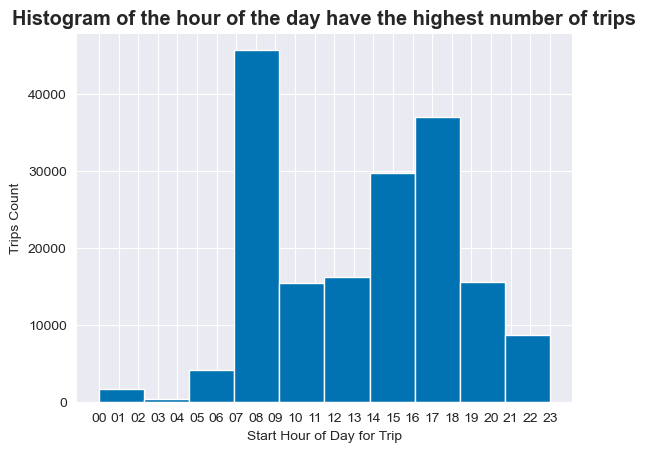

In [20]:
# Hour of the day with highest number of trips
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
df_fordgobike_trips.sort_values('start_hour_of_day', inplace=True)
plt.hist(data=df_fordgobike_trips, x='start_hour_of_day', color=base_color);
plt.rc('font', size=12) 
plt.rc('figure', titlesize=5) 
plt.xlabel('Start Hour of Day for Trip');
plt.ylabel('Trips Count');
plt.title("Histogram of the hour of the day have the highest number of trips", fontweight='bold');

The hour of the day with highest number of trips is between 7am to 9am

### Which day of the week has the highest number of trips.

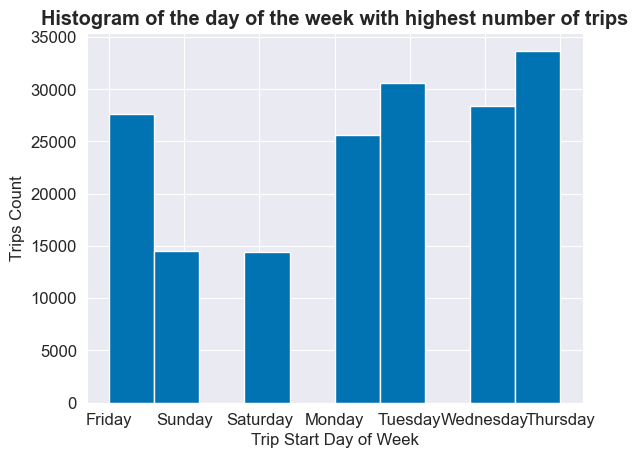

In [21]:
# trip distribution in a week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_category = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
df_fordgobike_trips['start_day_of_week'] = df_fordgobike_trips['start_day_of_week'].astype(days_category)
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.hist(data=df_fordgobike_trips, x='start_day_of_week', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Trips Count');
plt.rc('font', size=12) 
plt.title("Histogram of the day of the week with highest number of trips", fontweight='bold');

The day of the week with the highest number of trips is Thursday.

### Which month of the year has the highest number of trips?

In [22]:
# Before we visualize our data, let's see what kind of numbers we're looking at # chelseymarie6
df_fordgobike_trips.start_month.describe()

count       174884
unique           2
top       February
freq        174870
Name: start_month, dtype: object

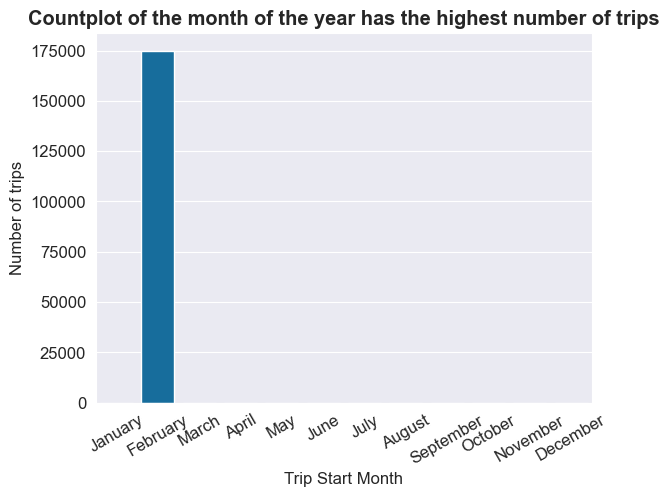

In [23]:
# month with the highest trip distribution 
num_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_categories = pd.api.types.CategoricalDtype(ordered=True, categories=num_months)
df_fordgobike_trips['start_month'] = df_fordgobike_trips['start_month'].astype(months_categories)
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data=df_fordgobike_trips, x='start_month', color=base_color);
plt.rc('font', size=12) 
plt.rc('figure', titlesize=12)
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Number of trips');
plt.title("Countplot of the month of the year has the highest number of trips", fontweight='bold');

the monthly trip distribution from the dataset is only for the month of February from start_time field.

### What is the distribution of users type of the FordGoBikes

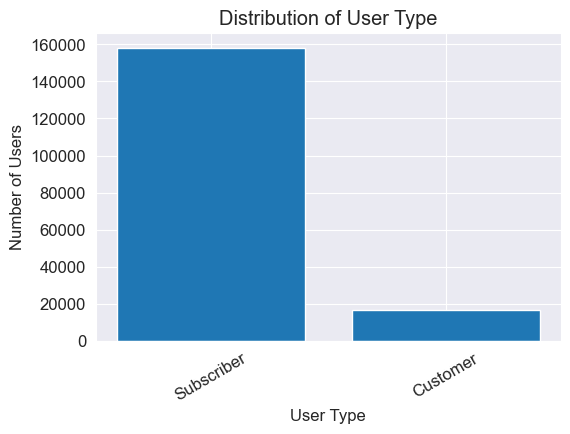

In [24]:
# plotting types of users 
plt.figure(figsize=[6,4])
plt.bar(x = df_fordgobike_trips.user_type.value_counts().keys(), height = df_fordgobike_trips.user_type.value_counts() )
plt.rc('font', size=12) 
plt.rc('figure', titlesize=12)
plt.xticks(rotation=30);
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

The user type of the FordGoBikes are Subscriber and Customer with Subscriber having the highesr number of distribution

### What is the usage distribution of FordGoBike based on age group

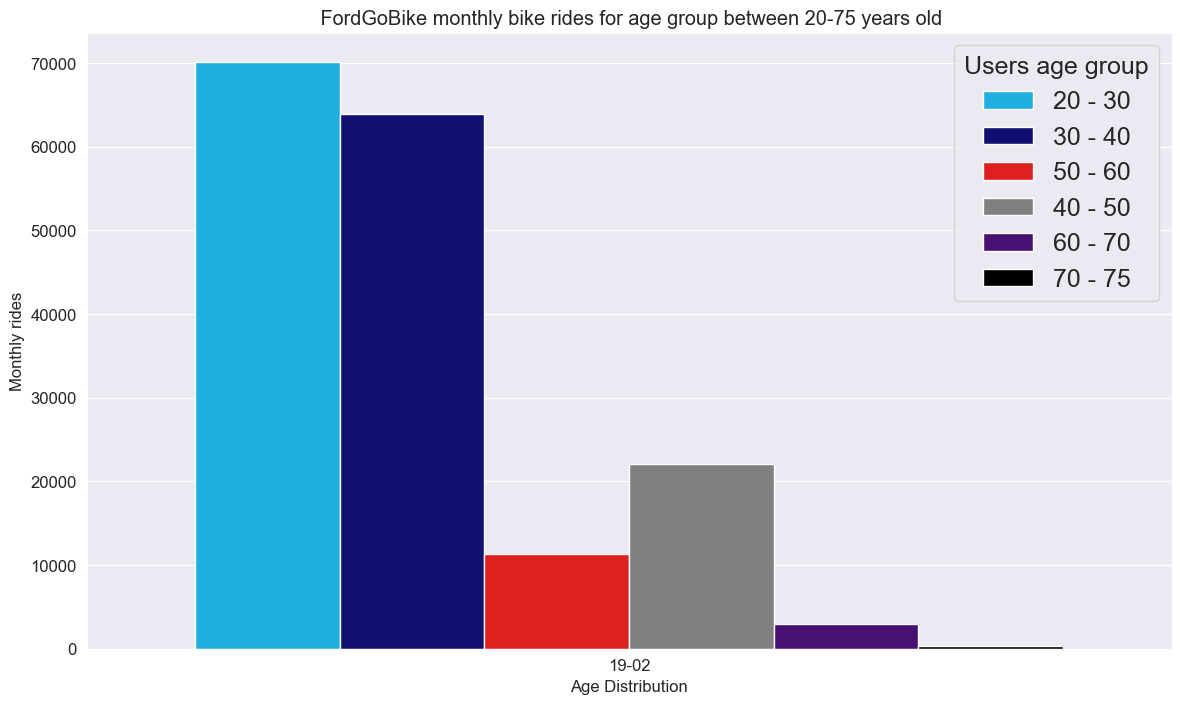

In [25]:
# Plot of FordGobike users based on age group
plt.figure(figsize=(14,8))
colors = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'gray', '50 - 60': 'red', '60 - 70': 'indigo', '70 - 75': 'black'}
axis = sb.countplot(x='start_year_and_month', hue='member_age_bins', palette=colors, data=df_fordgobike_trips[df_fordgobike_trips['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 75'])])
plt.title(' FordGoBike monthly bike rides for age group between 20-75 years old')
plt.rc('font', size=18) 
plt.rc('figure', titlesize=12)
plt.xlabel('Age Distribution')
plt.ylabel('Monthly rides')
legend = axis.legend()
legend.set_title('Users age group')

The age group with the highest number of FordGoBike usege is from 20 to 30 followed by 30 to 40 while the least age group is from 70 to 75 

### what is the percentage of FordGoBike users based on gender

In [26]:
# define a barh function for FordGoBike data visualization
def barplot(column, title=None, xlabel=None, ylabel=None, figsize=(20,10)):
    sb.set_style('darkgrid')

    # plot the data on a barplot chart
    colors = ['green', 'blue', 'red']
    column.plot(kind='barh', color=colors, figsize=figsize);
    plt.title(title, fontsize = 18);
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13);
    plt.yticks(fontsize = 11)
    plt.show()

In [27]:
# Get the percentage of gender
gender_trips = df_fordgobike_trips.groupby('member_gender').agg({'bike_id':'count'})
gender_trips['perc'] = (gender_trips['bike_id']/gender_trips['bike_id'].sum())*100

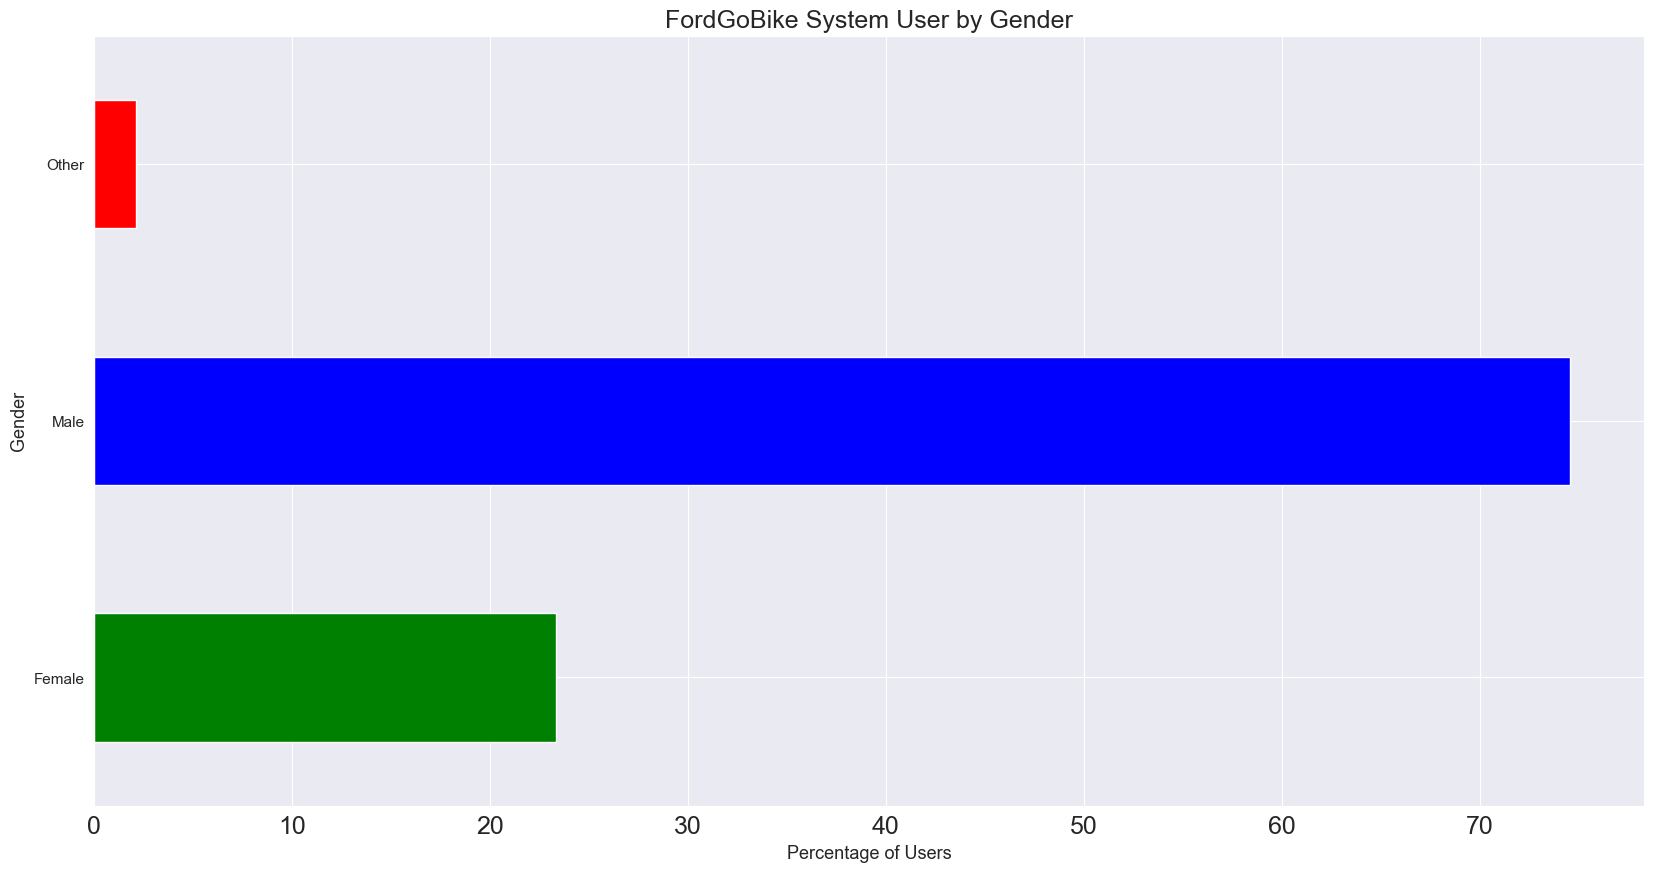

In [28]:
 # calling the barplot function to visualize our FordGoBike System User by Gender
barplot(gender_trips['perc'], 'FordGoBike System User by Gender' , 'Percentage of Users', 'Gender')

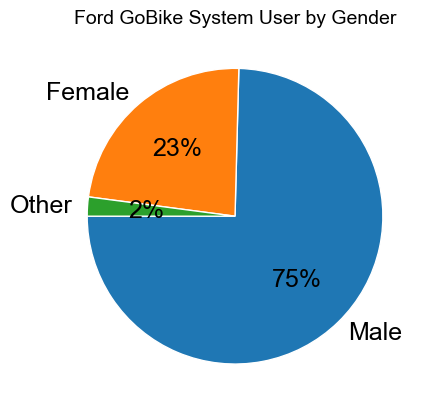

In [29]:
# Pie chart plot of percentage of FordGoBike users based on gender
users_gender = df_fordgobike_trips['member_gender'].value_counts()
plt.pie(users_gender, labels = users_gender.index, autopct= '%1.0f%%', shadow=False, textprops={'color':'black'}, counterclock = True, startangle = 180);
plt.title('Ford GoBike System User by Gender', fontweight='normal', fontsize=14, color = 'black');

75% of FordGoBike users are Males while 23% are females and 2% is for other gender.

### What is the data distribution for start station and end station

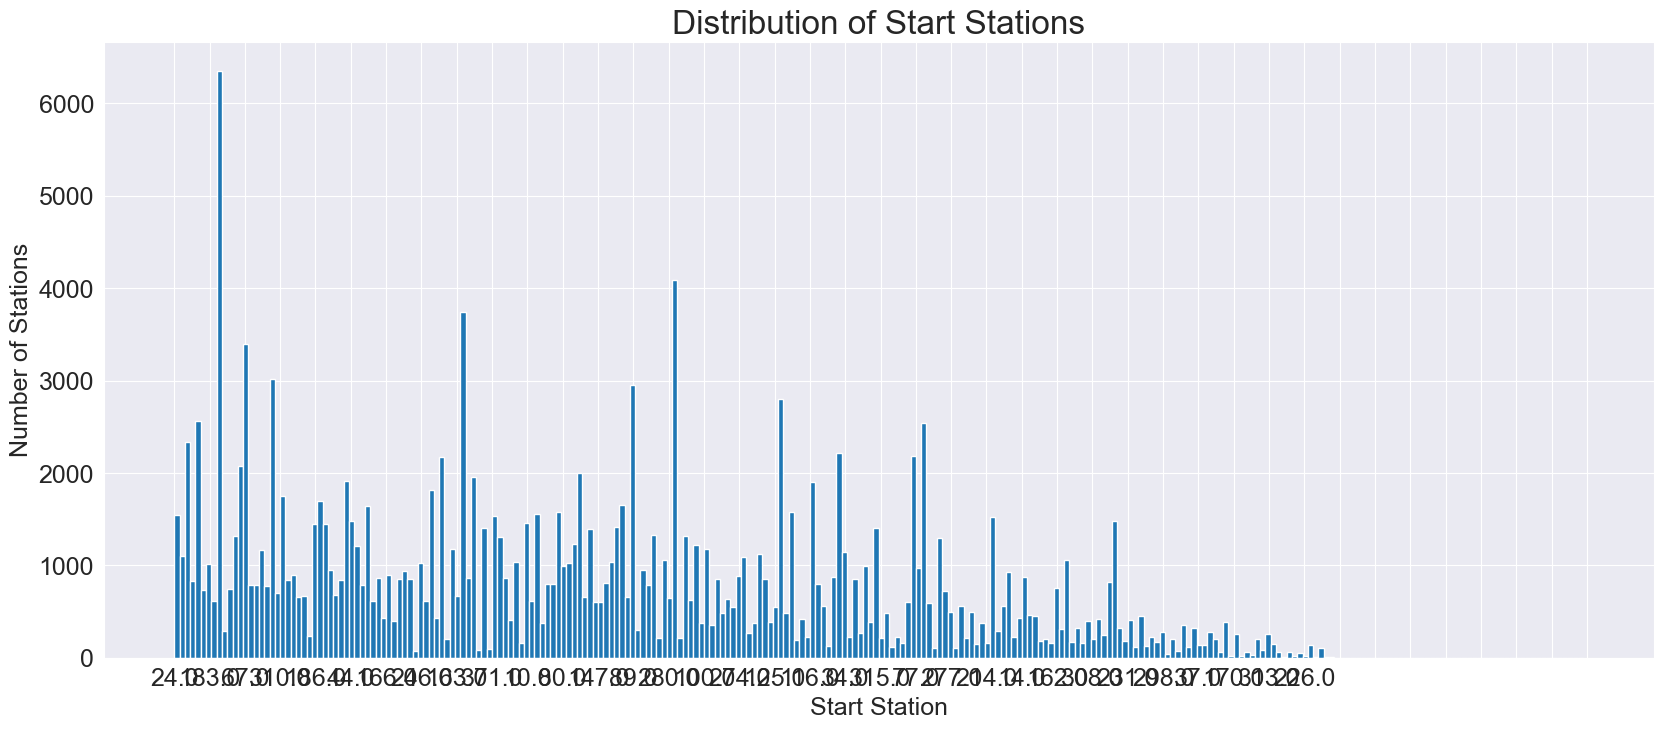

In [30]:
# Plotting start station id distribution on a standard scale
binsize = 1.5
bin_edges = np.arange(0, df_fordgobike_trips['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 402, 10))
plt.hist(data = df_fordgobike_trips.dropna(), x = 'start_station_id', bins = bin_edges)
plt.rc('font', size=20) 
plt.rc('figure', titlesize=16)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

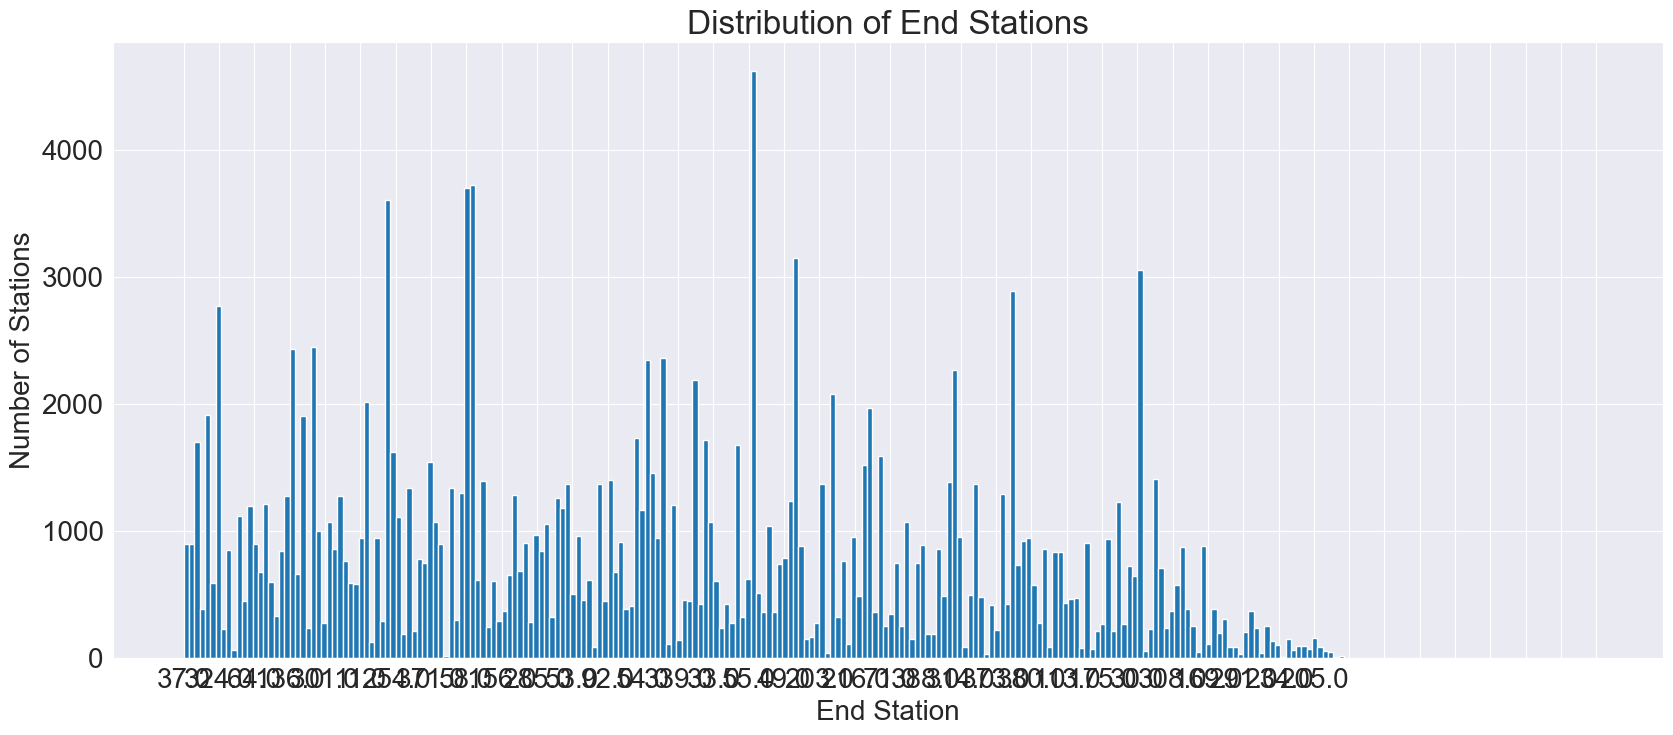

In [31]:
# Plotting end station id distribution.
binsize = 1.5
bin_edges = np.arange(0, df_fordgobike_trips['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 402, 10))
plt.hist(data = df_fordgobike_trips.dropna(), x = 'end_station_id', bins = bin_edges)
plt.rc('font', size=20) 
plt.rc('figure', titlesize=18)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

From the above charts, we can be able to predict which start station has the highest traffic and in order to find a way to reduce traffic in that station



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip peak hour of the day with highest number of trips is between 7am to 9am.
the monthly trip distribution from the dataset is only for the month of February using start_time field.
The day of the week with the highest number of trips is Thursday.
The user type of the FordGoBikes are Subscriber and Customer with Subscriber having the highesr number of distribution.
The age group with the highest number of FordGoBike usage is from 20 to 30 followed by 30 to 40 while the least age group is from 70 to 75.
75% of FordGoBike users are Males while 23% are females and the remaining percent is for other genders.

> When investigating the Birth year variables, Birth year is converted by substracting the year from current year in order to give the distibution for age and better perception. In addtion, start station and end station is plotted in a larger plot so that it gives a better insight regarding traffic of bikes at certain stations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There is nothing out of the ordinary expectation from the FordGoBike bike sharing dataset as I have already filter most of the data and created new colums from the data exploration stage.

## Bivariate Exploration.

### How does the trip duration distribution vary between customers and subscribers?

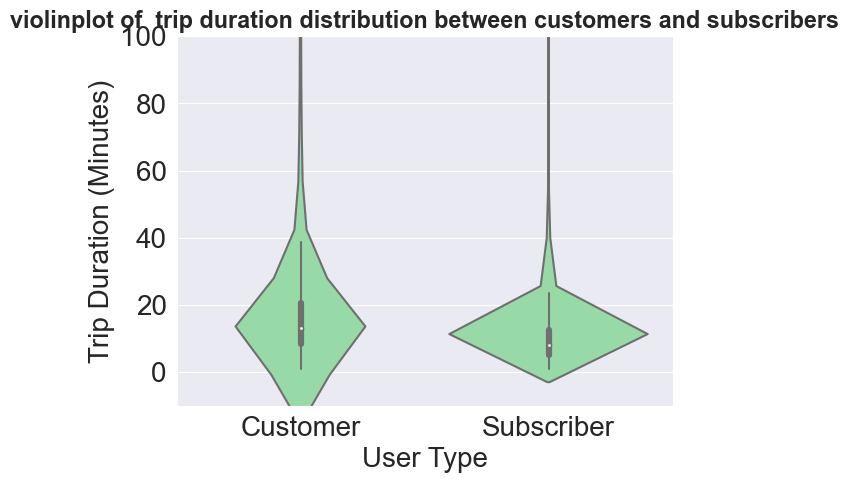

In [32]:
base_color = sb.color_palette("pastel")[2]
sb.violinplot(data=df_fordgobike_trips, x='user_type', y='trip_duration', color=base_color,  scale_hue=True);
plt.rc('font', size=14) 
plt.rc('figure', titlesize=12)
plt.ylim([-10, 100])
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Minutes)');
plt.title("violinplot of  trip duration distribution between customers and subscribers", fontweight='bold');

The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.



### Which user type uses the FordGoBike most?

In [33]:
# Get the number of Customers and Subscribers
customer_utype = df_fordgobike_trips.query('user_type == "Customer"')['bike_id'].count()
subscriber_utype = df_fordgobike_trips.query('user_type == "Subscriber"')['bike_id'].count()
customer_dist = customer_utype / df_fordgobike_trips['bike_id'].count()
subscriber_dist = subscriber_utype / df_fordgobike_trips['bike_id'].count()
print('Percentage ofPercentage of subscriber:', subscriber_dist)
print('Percentage of customer:', customer_dist)

Percentage ofPercentage of subscriber: 0.9049770133345532
Percentage of customer: 0.09502298666544681


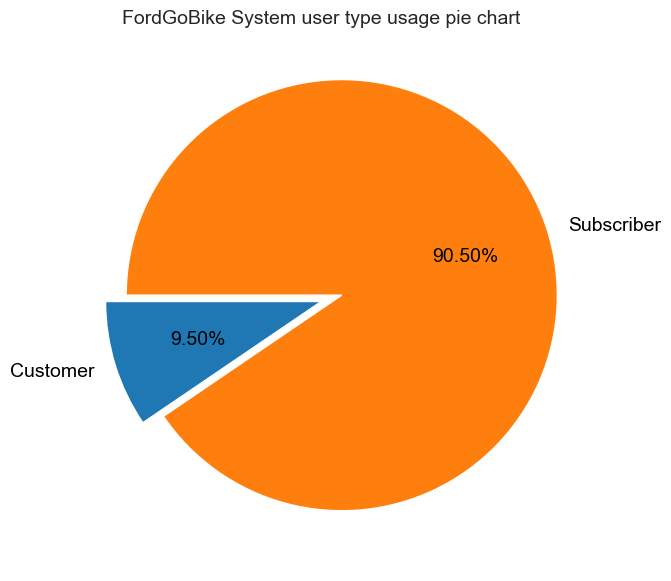

In [34]:
# pie chart of users type
fig_size = [customer_dist, subscriber_dist]
explode = (0, 0.1)
utype_label = ['Customer', 'Subscriber']
plt.figure(figsize = [9, 7])
plt.pie(fig_size, explode=explode, autopct='%1.2f%%', labels = utype_label, textprops={'color':'black'}, counterclock = True, shadow=False, startangle=180)
plt.title('FordGoBike System user type usage pie chart', fontsize=14, fontweight='normal');

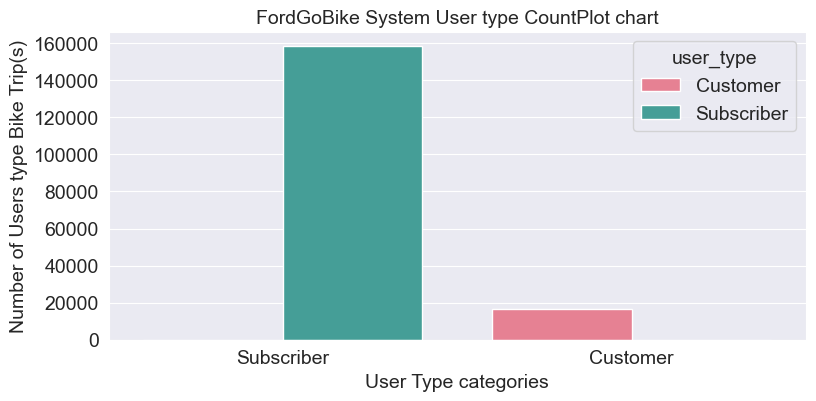

In [35]:
# # countplot chart of users type
plt.figure(figsize = [9, 4])
palette= sb.color_palette("husl", 2)
sb.countplot(data = df_fordgobike_trips, x = "user_type", order = df_fordgobike_trips.user_type.value_counts().index,  hue="user_type", palette=palette);
plt.rc('font', size=12) 
plt.rc('figure', titlesize=18)
plt.xlabel('User Type categories');
plt.ylabel('Number of Users type Bike Trip(s)');
plt.title('FordGoBike System User type CountPlot chart', fontweight='normal', fontsize=14);


Subscriber user type uses the FordGoBike system most with 90.50% while regular customers have 9.50%, this implies that most of the users have monthly or week membership subcription to use the FordGoBike system

### What is the average trip duration for subscribers and  customers?

Text(0, 0.5, 'trip duration(minutes)')

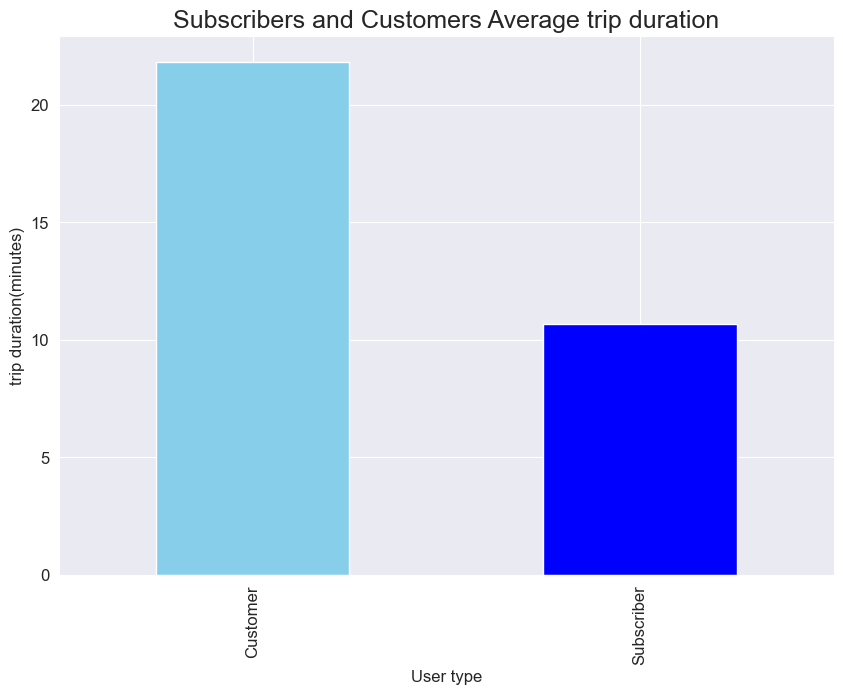

In [36]:
## Average trip duration of subscribers vs customers
colors=['skyblue', 'blue']
pls = df_fordgobike_trips.groupby('user_type')['trip_duration'].mean().plot(kind='bar', figsize=(10,7), color=colors, align='center')
pls.set_title('Subscribers and Customers Average trip duration', fontsize=18, y=1.0)
pls.set_xlabel('User type')
pls.set_ylabel('trip duration(minutes)')

From the barplot above, Customers' average trip duration is approximately 22 minutes while Subscribers' average trip duration is approximately 11 minutes.

### What is the trip duration distribution based on gender?

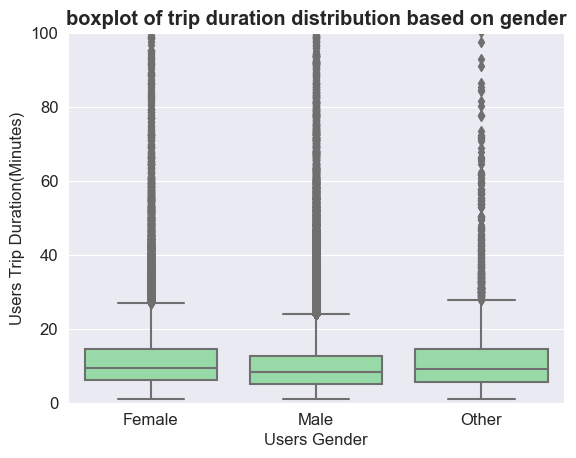

In [37]:
base_color = sb.color_palette("pastel")[2]
sb.boxplot(data=df_fordgobike_trips, x='member_gender', y='trip_duration', color=base_color);
plt.ylim([0, 100])
plt.xlabel('Users Gender');
plt.ylabel('Users Trip Duration(Minutes)');
plt.title("boxplot of trip duration distribution based on gender", fontweight='bold');

The Male users tend to have short trips followed by female users as indicated by smaller median and the shorter Interquartile range (IQR).

### What is the average Trip Duration during the week?

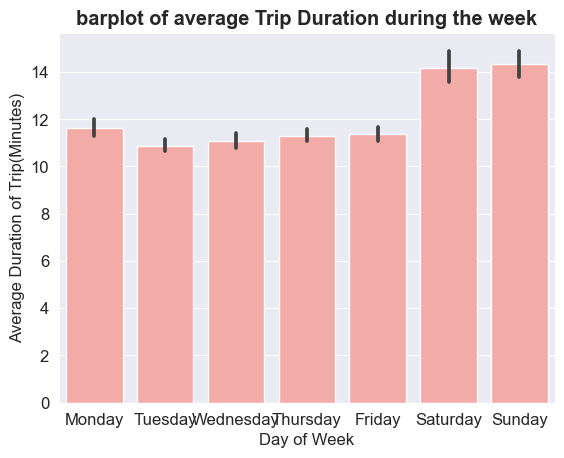

In [38]:
base_color = sb.color_palette("pastel")[3]
sb.barplot(data=df_fordgobike_trips, x='start_day_of_week', y='trip_duration', color=base_color);
plt.rc('font', size=12) 
plt.rc('figure', titlesize=12)
plt.xlabel('Day of Week',  fontsize=12);
plt.ylabel('Average Duration of Trip(Minutes)',  fontsize=12);
plt.title("barplot of average Trip Duration during the week", fontweight='bold');

The average duration for riding bike is smalller during the normal working days(i.e Monday to Friday) as opposed to weekend where we have higher trips.

### What is the average trip duration in a month?

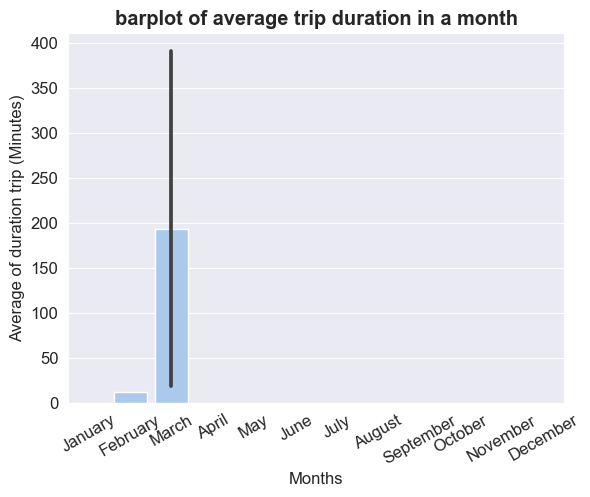

In [39]:
base_color = sb.color_palette("pastel")[0]
sb.barplot(data=df_fordgobike_trips, x='start_month', y='trip_duration', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Months');
plt.ylabel('Average of duration trip (Minutes)');
plt.title("barplot of average trip duration in a month", fontweight='bold');

The month with the highest trip duration is March with a wide margin followed by February with a lower margin while the remaining months are empty.

### What is the number of people that took bike rides by age group?

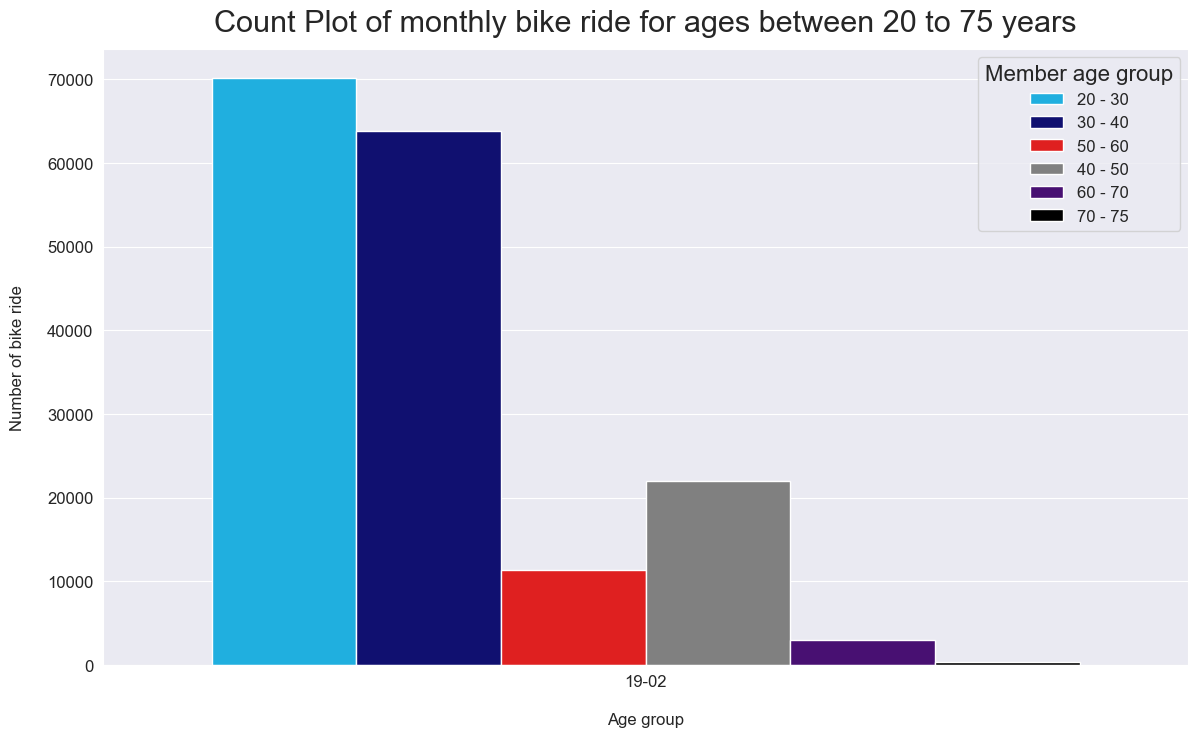

In [40]:
plt.figure(figsize=(14,8))
palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'gray', '50 - 60': 'red', '60 - 70': 'indigo', '70 - 75': 'black'}
axis = sb.countplot(x='start_year_and_month', hue='member_age_bins', palette=palette, data=df_fordgobike_trips[df_fordgobike_trips['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 75'])])
plt.title('Count Plot of monthly bike ride for ages between 20 to 75 years', fontsize=22, y=1.015)
plt.xlabel('Age group', labelpad=16)
plt.ylabel('Number of bike ride', labelpad=16)
leg = axis.legend()
leg.set_title('Member age group',prop={'size':16})
axis = plt.gca()

The ages of most frequent users of the FordGoBike system is 20-30 years followed by 30-40 years old users while the least users age group is 70 to 75 years old

### Which age group rent the bike most during works day?

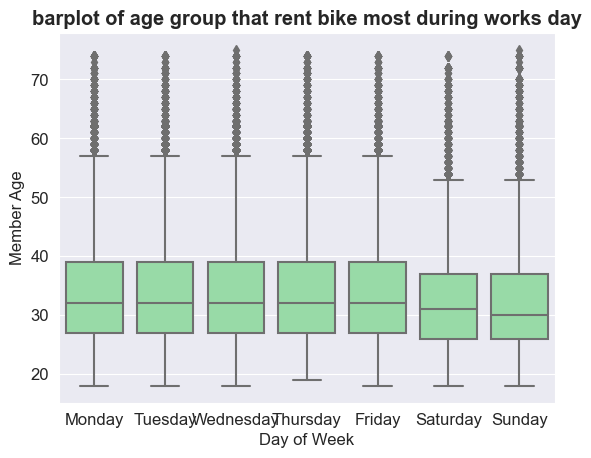

In [41]:
base_color = sb.color_palette("pastel")[2]
sb.boxplot(data=df_fordgobike_trips, x='start_day_of_week', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.title("barplot of age group that rent bike most during works day", fontweight='bold');

Members who rented the bikes from Monday to Friday are a bit older than those who rent the bike on weekends which implies that older users rent the bikes for commuting to work.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the Charts above, we have more subscriber (95.50%) users than customers(9.50%). Bike riders varies between subscribers and customers. Most subscribers use the bike rentail system for going to work thus resulting to high number of trips on work days (i.e Monday-Friday), whereas customers mostly tend to rent and ride the bike for fun during the weekends. Subscriber users are slightly older than customer users who tend to take longer rides overall.
The Male users tend to have short trips compared to female users. 
The average duration for riding bike is smalller during the normal working days(i.e Monday to Friday) as opposed to weekend where we have higher trips.
The ages of most frequent users of the FordGoBike system is 20-30 years followed by 30-40 years old users while the least users age group is 70 to 75 years old.
The Customers' average trip duration is approximately 22 minutes while Subscribers' average trip duration is approximately 11 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>The fact that subscriber  has 95.50% users while customers has just 9.50% and the fact that we have the month of March when plotting average trip duration in a month using start_month and trip_duration while the month of March was not there in my Univariate Exploration plot

## Multivariate Exploration

### Which gender and user type take longer trips

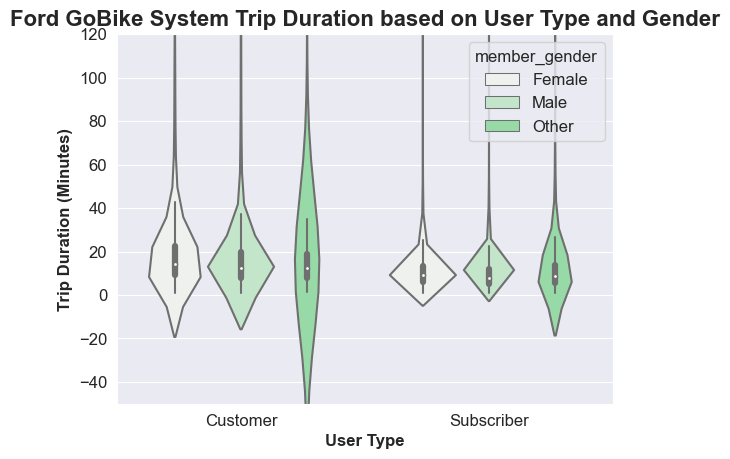

In [42]:
#  violinplot for trips duration on gender and user type 
base_color = sb.color_palette("pastel")[2]
sb.violinplot(data=df_fordgobike_trips, x='user_type', y="trip_duration", hue="member_gender",color=base_color, height=5, aspect=2, scale_hue=True);
plt.ylim([-50, 120])
plt.xlabel('User Type', fontsize=12, fontweight='bold');
plt.ylabel('Trip Duration (Minutes)', fontsize=12, fontweight='bold');
plt.title('Ford GoBike System Trip Duration based on User Type and Gender', fontsize=16, fontweight='bold');

From the violin plot above, the gender and user type with longer duration of trips is female followed by male and other gender

### Does age and gender affect trip duration

In [43]:
# define a scatterplot function for age, gender and user type data visualization
def scatterplot(data_column, xrow=None, yrow=None, xlim =None, ylim=None, col=None, col_wrap=None, hue=None, despine=None, title=None, xlabel=None, ylabel=None, figsize=(20,10)):
    # plot the data on a scatterplot chart
    fg = sb.FacetGrid(data = data_column, col = col, col_wrap = col_wrap, hue=hue, despine=despine,
                 xlim = xlim, ylim = ylim)
    fg.map(plt.scatter, xrow, yrow, alpha= 1)

    fg.set_xlabels(xlabel)
    fg.set_ylabels(ylabel)
    fg.fig.subplots_adjust(top=0.9)
    fg.fig.suptitle(title, fontsize = 16)
    fg.add_legend()

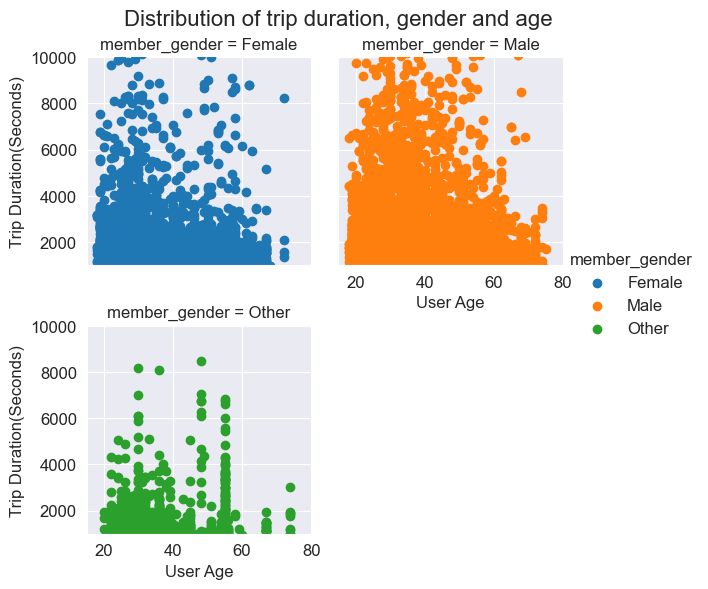

In [44]:
# scatter plot for age and gender distribution based on trip duration
scatterplot(df_fordgobike_trips, 'member_age', 'duration_sec', [15, 80], [1000, 10000],'member_gender', 2, 'member_gender',True, 'Distribution of trip duration, gender and age' , 'User Age', 'Trip Duration(Seconds)')

The the charts above, the older persons tend to have shorter trips compared to younger persons who have longer trips for both male, female and other gender

### Does user type and age affect trip duration

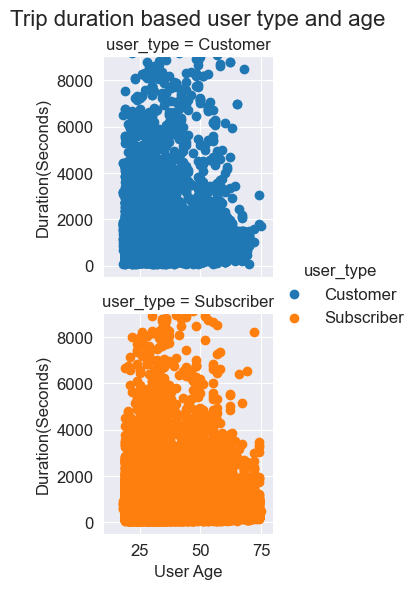

In [45]:
# scatter plot for user type and age  distribution based on trip duration
scatterplot(df_fordgobike_trips, 'member_age', 'duration_sec', [10, 80], [-500, 9000],'user_type', 1, 'user_type',True, 'Trip duration based user type and age' , 'User Age', 'Duration(Seconds)')

The trip duration for customer and subscriber are showing almost the same trends but subcriber has a higher trip duration for old persons compared to customer

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observe that the male gender has higher number of trip duration compare to female and other gender and the younger gender also spend more trip duration compared to older gender.
Customer and Subscriber user type trip duration are relatively the same.


### Were there any interesting or surprising interactions between features?

> When all the interactions between the features are considered together, they all complement one another and make sense, therefore, there is nothing out of the ordinary. Because there are disproportionately more male riders than females, there may not be a significant difference in usage habits between men and women throughout the investigation. If there were more female data, it would be interesting to observe the differences in system usage between men and women.

## Conclusions
>Renting a bike from the FordGoBike System is an excellent, healthy and environmentally beneficial way to get around the city for both leisure and work purposes.
After carefully examining and going through the data wrangling process, I realized that I needed to add more data columns—trip_duration, start_date, start_hour_of_day, start_day_of_week and start_month  to help with my data visualization. During the data wrangling process, I converted start_time and end_time to datetime format, start_station_id, end_station_id, and bike_id to object format and user_type and member_gender to category format to ease my data visualization process. I made used of univariate, bivariate, and multivariate to visualize and analysis the data during data investigation.

> below are some of my findings that are related to the features of interest:

- The system is used by two different sorts of clients: Subscribers and Customers. 
- The majority of subscribers rent bicycles daily between the hours of 7am to 9am while Customers are mostly tourists or occassional riders who use the system mainly during weekend to tour round the city.
- Percentage of subscribers is 90.50% while that of the customers is 9.50%.
- The highest number of FordGoBike user age group is from 20 to 30 followed by 30 to 40 while the least age group is from 70 to 75.
- 75% of FordGoBike users are Males while 23% are females and the remaining percent is for other genders.
- The Male users tend to have short trips compared to female users.
- The Customers' average trip duration is approximately 22 minutes while Subscribers' average trip duration is approximately 11 minutes.
- Majortity of the trips are carried out during the week mostly on Thursdays'.